# Read the Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



In [2]:
A =  pd.read_csv("E:/ETLHIVE/ROUGH/cars93.csv")

# Missing data treatment

In [3]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

replacer(A)

In [5]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Exploratory Data Analysis

In [6]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g") # observe outliers,mean,min,max,25%,75% in specific feature
        plt.show()
    
        sb.distplot(df[i],color ="r") # observe skew & distribution of population
        plt.show()

    
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl") # count each category in feature  
        plt.show()

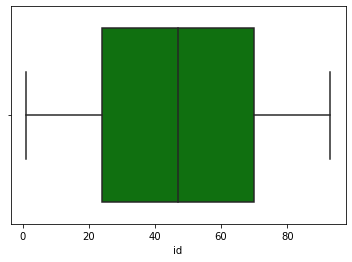

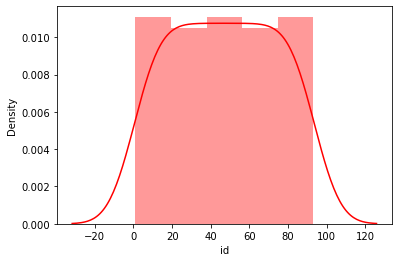

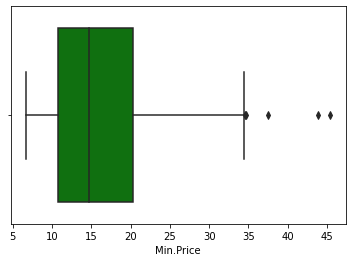

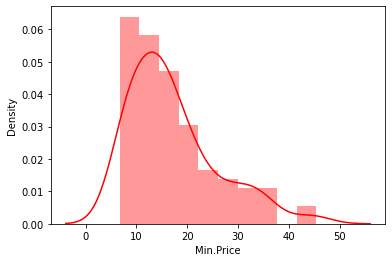

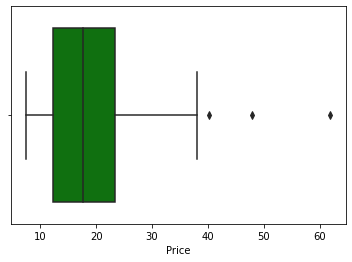

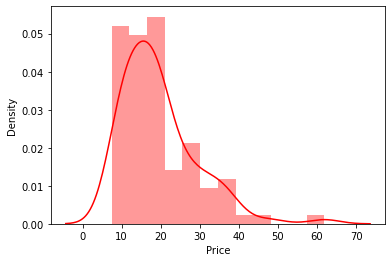

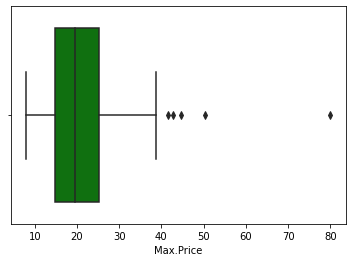

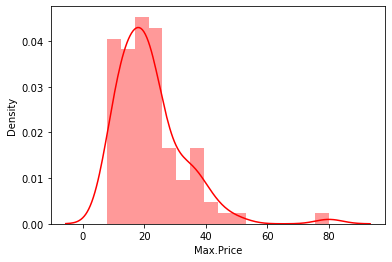

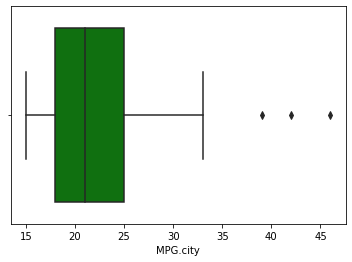

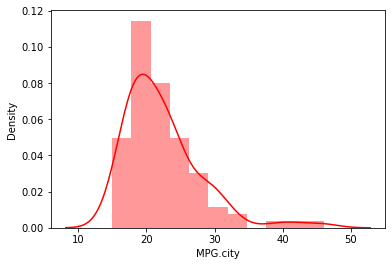

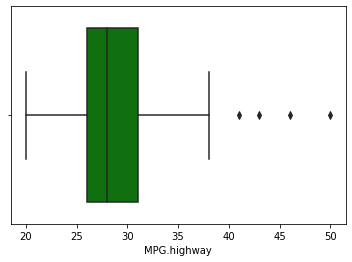

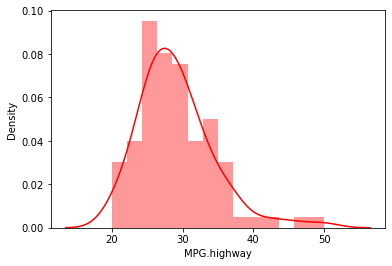

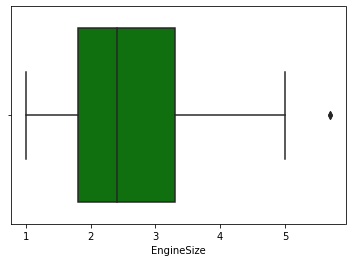

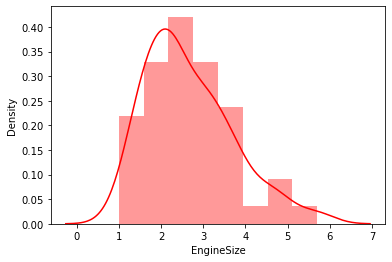

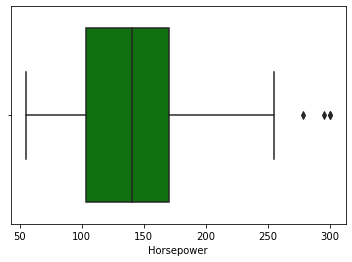

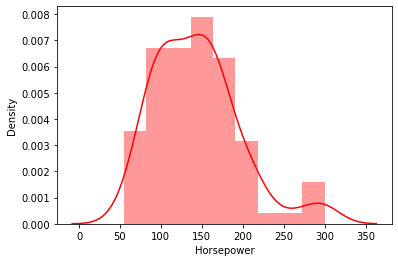

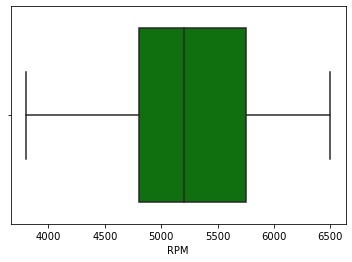

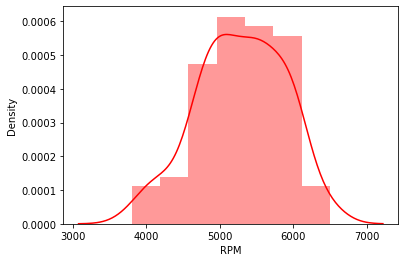

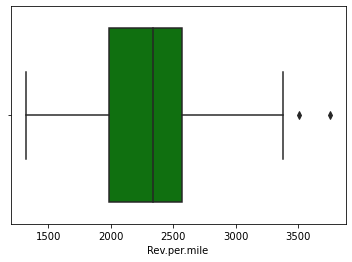

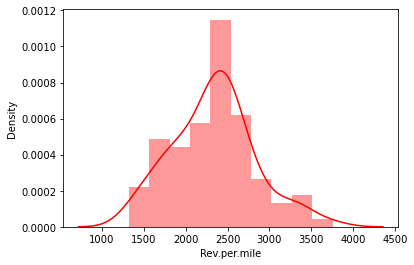

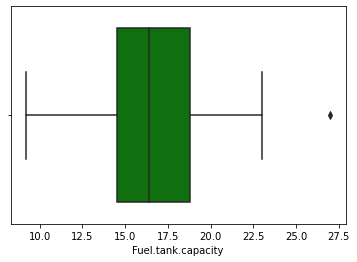

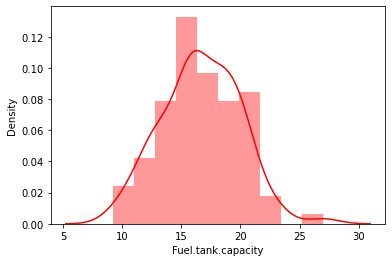

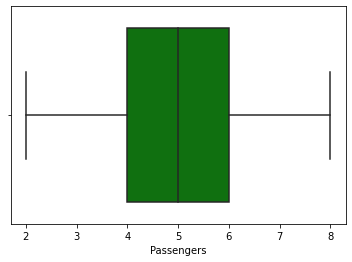

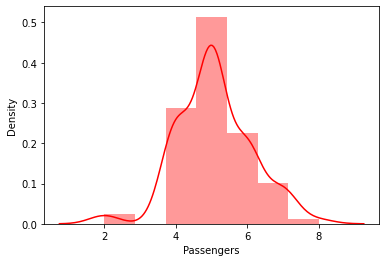

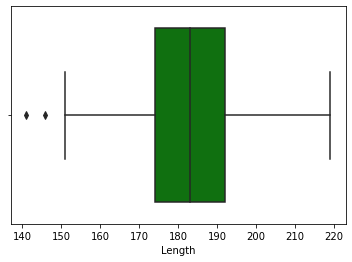

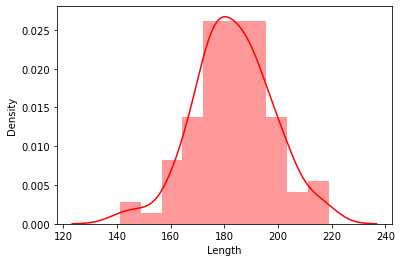

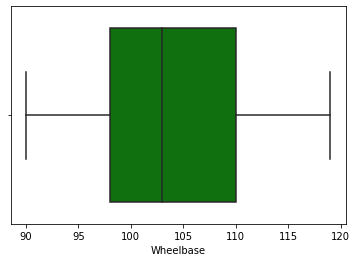

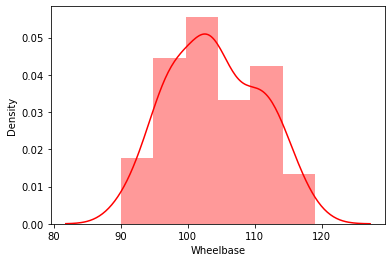

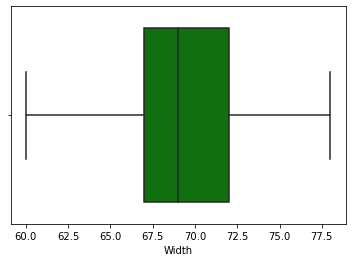

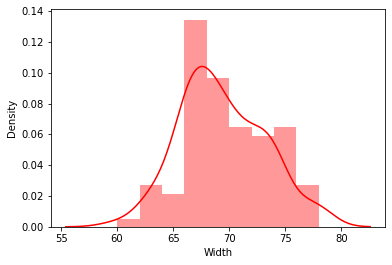

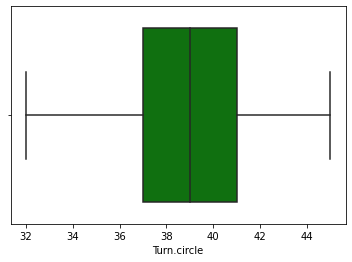

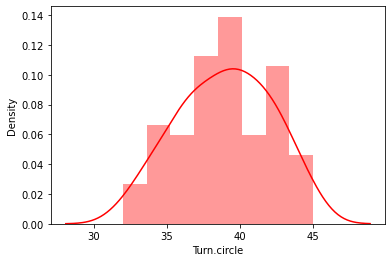

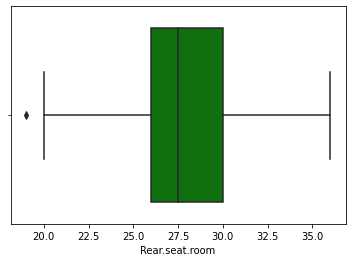

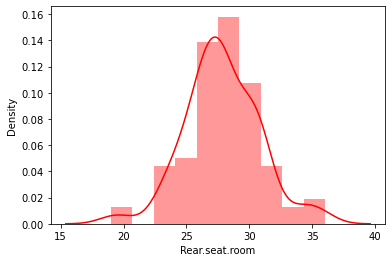

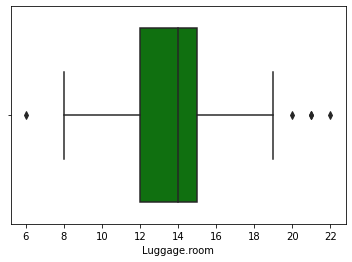

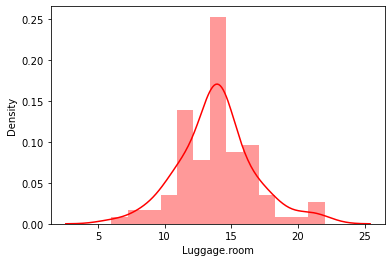

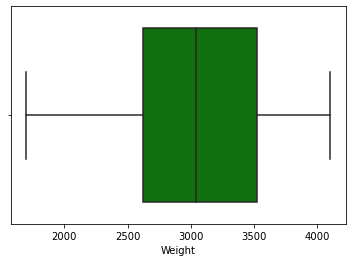

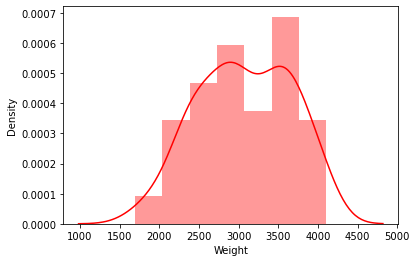

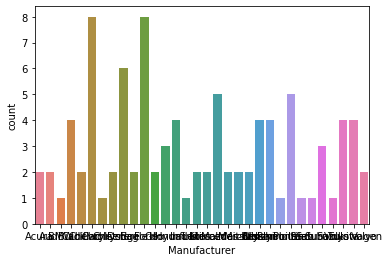

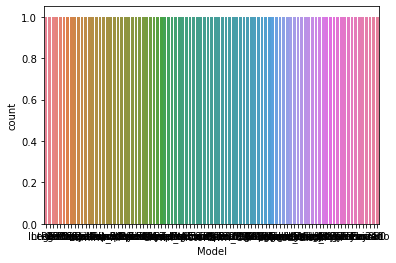

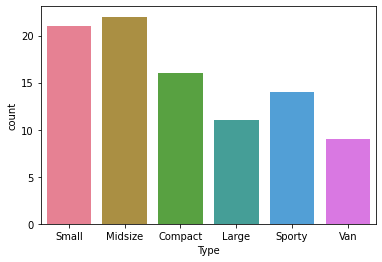

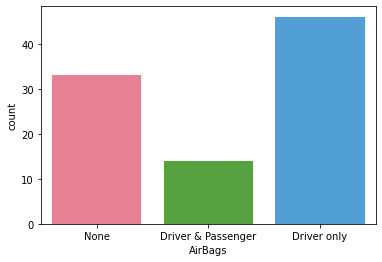

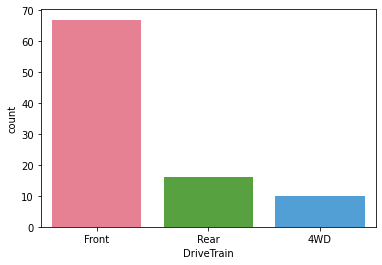

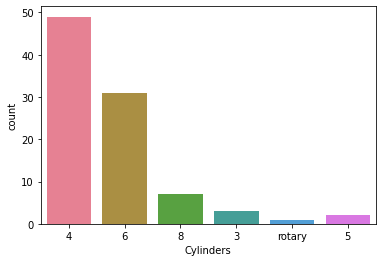

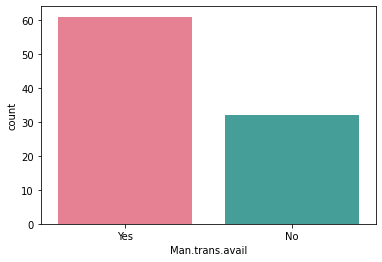

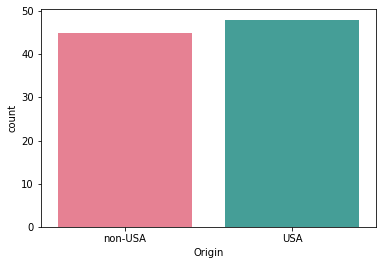

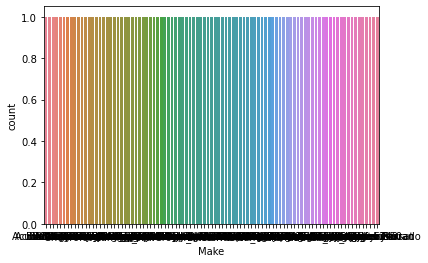

In [7]:
EDA(A)

# Define Y and X

In [8]:
Y = A[["Weight"]]
X = A.drop(labels = ["Weight","id","Make","Model","Manufacturer"],axis = 1)

# Preprocessing

In [9]:
def preprocessing(X):
    cat = []
    con = []
    import pandas as pd
    for i in X.columns:
        if(X[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)    

    X1 = pd.get_dummies(X[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    Xnew = X2.join(X1)
    return Xnew


In [10]:
Xnew= preprocessing(X)

In [11]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size = 0.2,random_state = 21)


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model= lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print(tr_err)
print(ts_err)

68.77253825890064
110.07412705357015


# OLS model

In [13]:
from warnings import filterwarnings
filterwarnings("ignore")

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     54.43
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.05e-24
Time:                        03:54:19   Log-Likelihood:                -434.28
No. Observations:                  74   AIC:                             936.6
Df Residuals:                      40   BIC:                             1015.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1031.1457     18.681     55.196      0.000     993.389    1068.902
Min.Price                   -771.8532   2932.774     -0.263      0.794   -6699.210    5155.504
Price                       1731.4872   6460.141      0.268      0.790   -1.13e+04    1.48e+04
Max.Price                  -1019.8102   3687.678     -0.277      0.784   -8472.886    6433.266
MPG.city                      -3.4726     68.414     -0.051      0.960    -141.742     134.797
MPG.highway                 -112.8580     59.931     -1.883      0.067    -233.983       8.267
EngineSize                    53.9114     97.497      0.553      0.583    -143.138     250.960
Horsepower                   162.1039     86.383      1.877      0.068     -12.483     336.691
RPM                          -42.8866     44.735     -0.959      0.343    -133.299      47.525
Rev.per.mile                  -2.4184     34.902     -0.069      0.945     -72.957      68.121
Fuel.tank.capacity             3.0201     48.883      0.062      0.951     -95.776     101.816
Passengers                    10.7854     49.078      0.220      0.827     -88.405     109.976
Length                        80.1911     43.351      1.850      0.072      -7.424     167.806
Wheelbase                    192.8349     51.457      3.747      0.001      88.836     296.834
Width                         72.6793     57.889      1.255      0.217     -44.319     189.678
Turn.circle                  -13.0020     38.138     -0.341      0.735     -90.081      64.077
Rear.seat.room               -41.2893     35.199     -1.173      0.248    -112.429      29.851
Luggage.room                  41.6803     30.309      1.375      0.177     -19.576     102.937
Type_Compact                 175.1905     53.526      3.273      0.002      67.011     283.370
Type_Large                    29.4768     74.954      0.393      0.696    -122.011     180.965
Type_Midsize                 142.6109     50.637      2.816      0.008      40.269     244.953
Type_Small                   149.6973     80.979      1.849      0.072     -13.967     313.361
Type_Sporty                  190.5620     79.740      2.390      0.022      29.402     351.722
Type_Van                     343.6082    118.987      2.888      0.006     103.127     584.090
AirBags_Driver & Passenger   341.0741     41.124      8.294      0.000     257.959     424.189
AirBags_Driver only          369.7728     24.546     15.064      0.000     320.163     419.383
AirBags_None                 320.2988     33.335      9.609      0.000     252.927     387.670
DriveTrain_4WD               368.2903     47.502      7.753      0.000     272.286     464.295
DriveTrain_Front             327.8506     36.933      8.877      0.000     253.206     402.495
DriveTrain_Rear              335.0047     5

In [14]:
len(xconst)

74

# Drop the columns with a pval outside threshold

In [15]:
# Q = pd.DataFrame(model.pvalues,columns=["pval"])
# x = Q.pval.max()
# col_to_drop = Q[Q.pval == x].index[0]

In [16]:
xconst.columns

Index(['const', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Type_Compact', 'Type_Large',
       'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3',
       'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Cylinders_8',
       'Cylinders_rotary', 'Man.trans.avail_No', 'Man.trans.avail_Yes',
       'Origin_USA', 'Origin_non-USA'],
      dtype='object')

# Do this recurring till best adj R squared

In [17]:
xtrain = xtrain[['MPG.highway', 'Horsepower', 'RPM', 'Length', 'Wheelbase',
       'Width', 'Rear.seat.room', 'Luggage.room', 'Type_Van',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3',
       'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Man.trans.avail_No',
       'Man.trans.avail_Yes', 'Origin_USA', 'Origin_non-USA','EngineSize']]

In [18]:
# Q = pd.DataFrame(model.pvalues,columns =["pval"])
# x = Q.pval.max()
# col_to_drop = Q[Q.pval == x].index[0]
# print("Column dropped:",col_to_drop,"/n/n/n/n")
# Xnew = Xnew.drop(labels = [col_to_drop],axis = 1)
# xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state = 21)
# xconst= add_constant(xtrain)
# ol = OLS(ytrain,xconst)
# model = ol.fit()
# model.summary()

In [19]:
len(xconst)

74

In [20]:
xconst.columns

Index(['const', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Type_Compact', 'Type_Large',
       'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3',
       'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Cylinders_8',
       'Cylinders_rotary', 'Man.trans.avail_No', 'Man.trans.avail_Yes',
       'Origin_USA', 'Origin_non-USA'],
      dtype='object')

# Following columns are important as per OLS 

In [23]:
xtest = xtest[['MPG.highway', 'Horsepower', 'RPM', 'Length', 'Wheelbase',
       'Width', 'Rear.seat.room', 'Luggage.room', 'Type_Van',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3',
       'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Man.trans.avail_No',
       'Man.trans.avail_Yes', 'Origin_USA', 'Origin_non-USA','EngineSize']]

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model= lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print(tr_err)
print(ts_err)

72.70172831421995
445.9040098282921


In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 24 May 2022   Prob (F-statistic):           8.41e-37
Time:                        03:56:18   Log-Likelihood:                -438.08
No. Observations:                  74   AIC:                             916.2
Df Residuals:                      54   BIC:                             962.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1070.1635     29.842     35.861      0.000    1010.334    1129.993
MPG.highway                 -116.2185     23.147     -5.021      0.000    -162.626     -69.811
Horsepower                   214.8574     37.923      5.666      0.000     138.826     290.889
RPM                          -80.1031     22.308     -3.591      0.001    -124.829     -35.377
Length                       100.2809     34.750      2.886      0.006      30.611     169.950
Wheelbase                    168.6107     34.273      4.920      0.000      99.897     237.325
Width                         63.6988     40.617      1.568      0.123     -17.733     145.130
Rear.seat.room               -45.5328     27.008     -1.686      0.098     -99.680       8.614
Luggage.room                  34.6756     23.126      1.499      0.140     -11.690      81.041
Type_Van                     259.3976     85.917      3.019      0.004      87.144     431.651
AirBags_Driver & Passenger   341.4676     35.407      9.644      0.000     270.482     412.454
AirBags_Driver only          383.7269     19.904     19.279      0.000     343.821     423.633
AirBags_None                 344.9689     24.414     14.130      0.000     296.022     393.916
DriveTrain_4WD               385.6852     39.646      9.728      0.000     306.200     465.170
DriveTrain_Front             347.8234     27.511     12.643      0.000     292.667     402.980
DriveTrain_Rear              336.6549     37.926      8.877      0.000     260.618     412.692
Cylinders_3                  361.3154    153.106      2.360      0.022      54.357     668.274
Cylinders_4                  227.2940     94.853      2.396      0.020      37.126     417.462
Cylinders_5                  398.3165    129.594      3.074      0.003     138.497     658.136
Cylinders_6                  181.3271     71.221      2.546      0.014      38.538     324.116
Man.trans.avail_No           560.7239     25.715     21.805      0.000     509.169     612.279
Man.trans.avail_Yes          509.4396     26.320     19.355      0.000     456.670     562.209
Origin_USA                   463.1726     22.134     20.925      0.000     418.796     507.550
Origin_non-USA               606.9909     24.197     25.085      0.000     558.478     655.504
==============================================================================
Omnibus:                        1.918   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.864
Skew:                           0.312   Prob(JB):                        0.394
Kurtosis:                       2.535   Cond. No.                     3.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the 

# Dropped  features till adj R square become max & reducing 